In [1]:
import pandas as pd
import string
import numpy as np
from datetime import datetime
from razdel import tokenize
from pymystem3 import Mystem
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

In [10]:
stop_words = stopwords.words('russian')
df = pd.read_csv("googleMapsGazpromBank.csv")
#df = pd.read_csv("googleMapsSberbank.csv")
df.head()
m = Mystem()
df['text'] = df['text'].fillna('')
print(df['rating'].describe())

count    3419.000000
mean        3.427903
std         1.686606
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [3]:
# получение и обработка оценок
ratings = df['rating']
countReviews = len(ratings)
summaryRating = 0
for el in ratings:
    summaryRating += el
averageRating = summaryRating / countReviews
print(f'Количество отзывов - {countReviews}')
print(f'Средний рейтинг - {averageRating}')

Количество отзывов - 3544
Средний рейтинг - 2.596218961625282


In [4]:
# убирание знаков препинания, токенизация, рассчёт средней длины
text = ' '.join(df['text'])
textsReviews = df['text']
lensSymbols = 0

for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
tokensList = list(tokenize(text))
tokens = [_.text for _ in tokensList]
print(f'Количество слов - {len(tokens)}')
allTokens = [tokens[i:i+50000] for i in range(0, len(tokens), 50000)]
listTexts = []
for el in allTokens:
    listTexts.append(' '.join(el))
    
for elem in textsReviews:
    lensSymbols += len(elem)
averageSymbols = lensSymbols / countReviews
averageWords = len(tokensList) / countReviews
print(f'Среднее количество символов в отзыве - {averageSymbols}')
print(f'Среднее количество слов в отзыве - {averageWords}')

Количество слов - 63254
Среднее количество символов в отзыве - 120.25818284424379
Среднее количество слов в отзыве - 17.848194130925506


In [5]:
# лемматизация
tempTexts = []
for el in listTexts:
    lemmas = m.lemmatize(el)
    tempText = ''.join(lemmas)
    tempTexts.append(tempText)
text = ''.join(tempTexts)

(-0.5, 1999.5, 1499.5, -0.5)

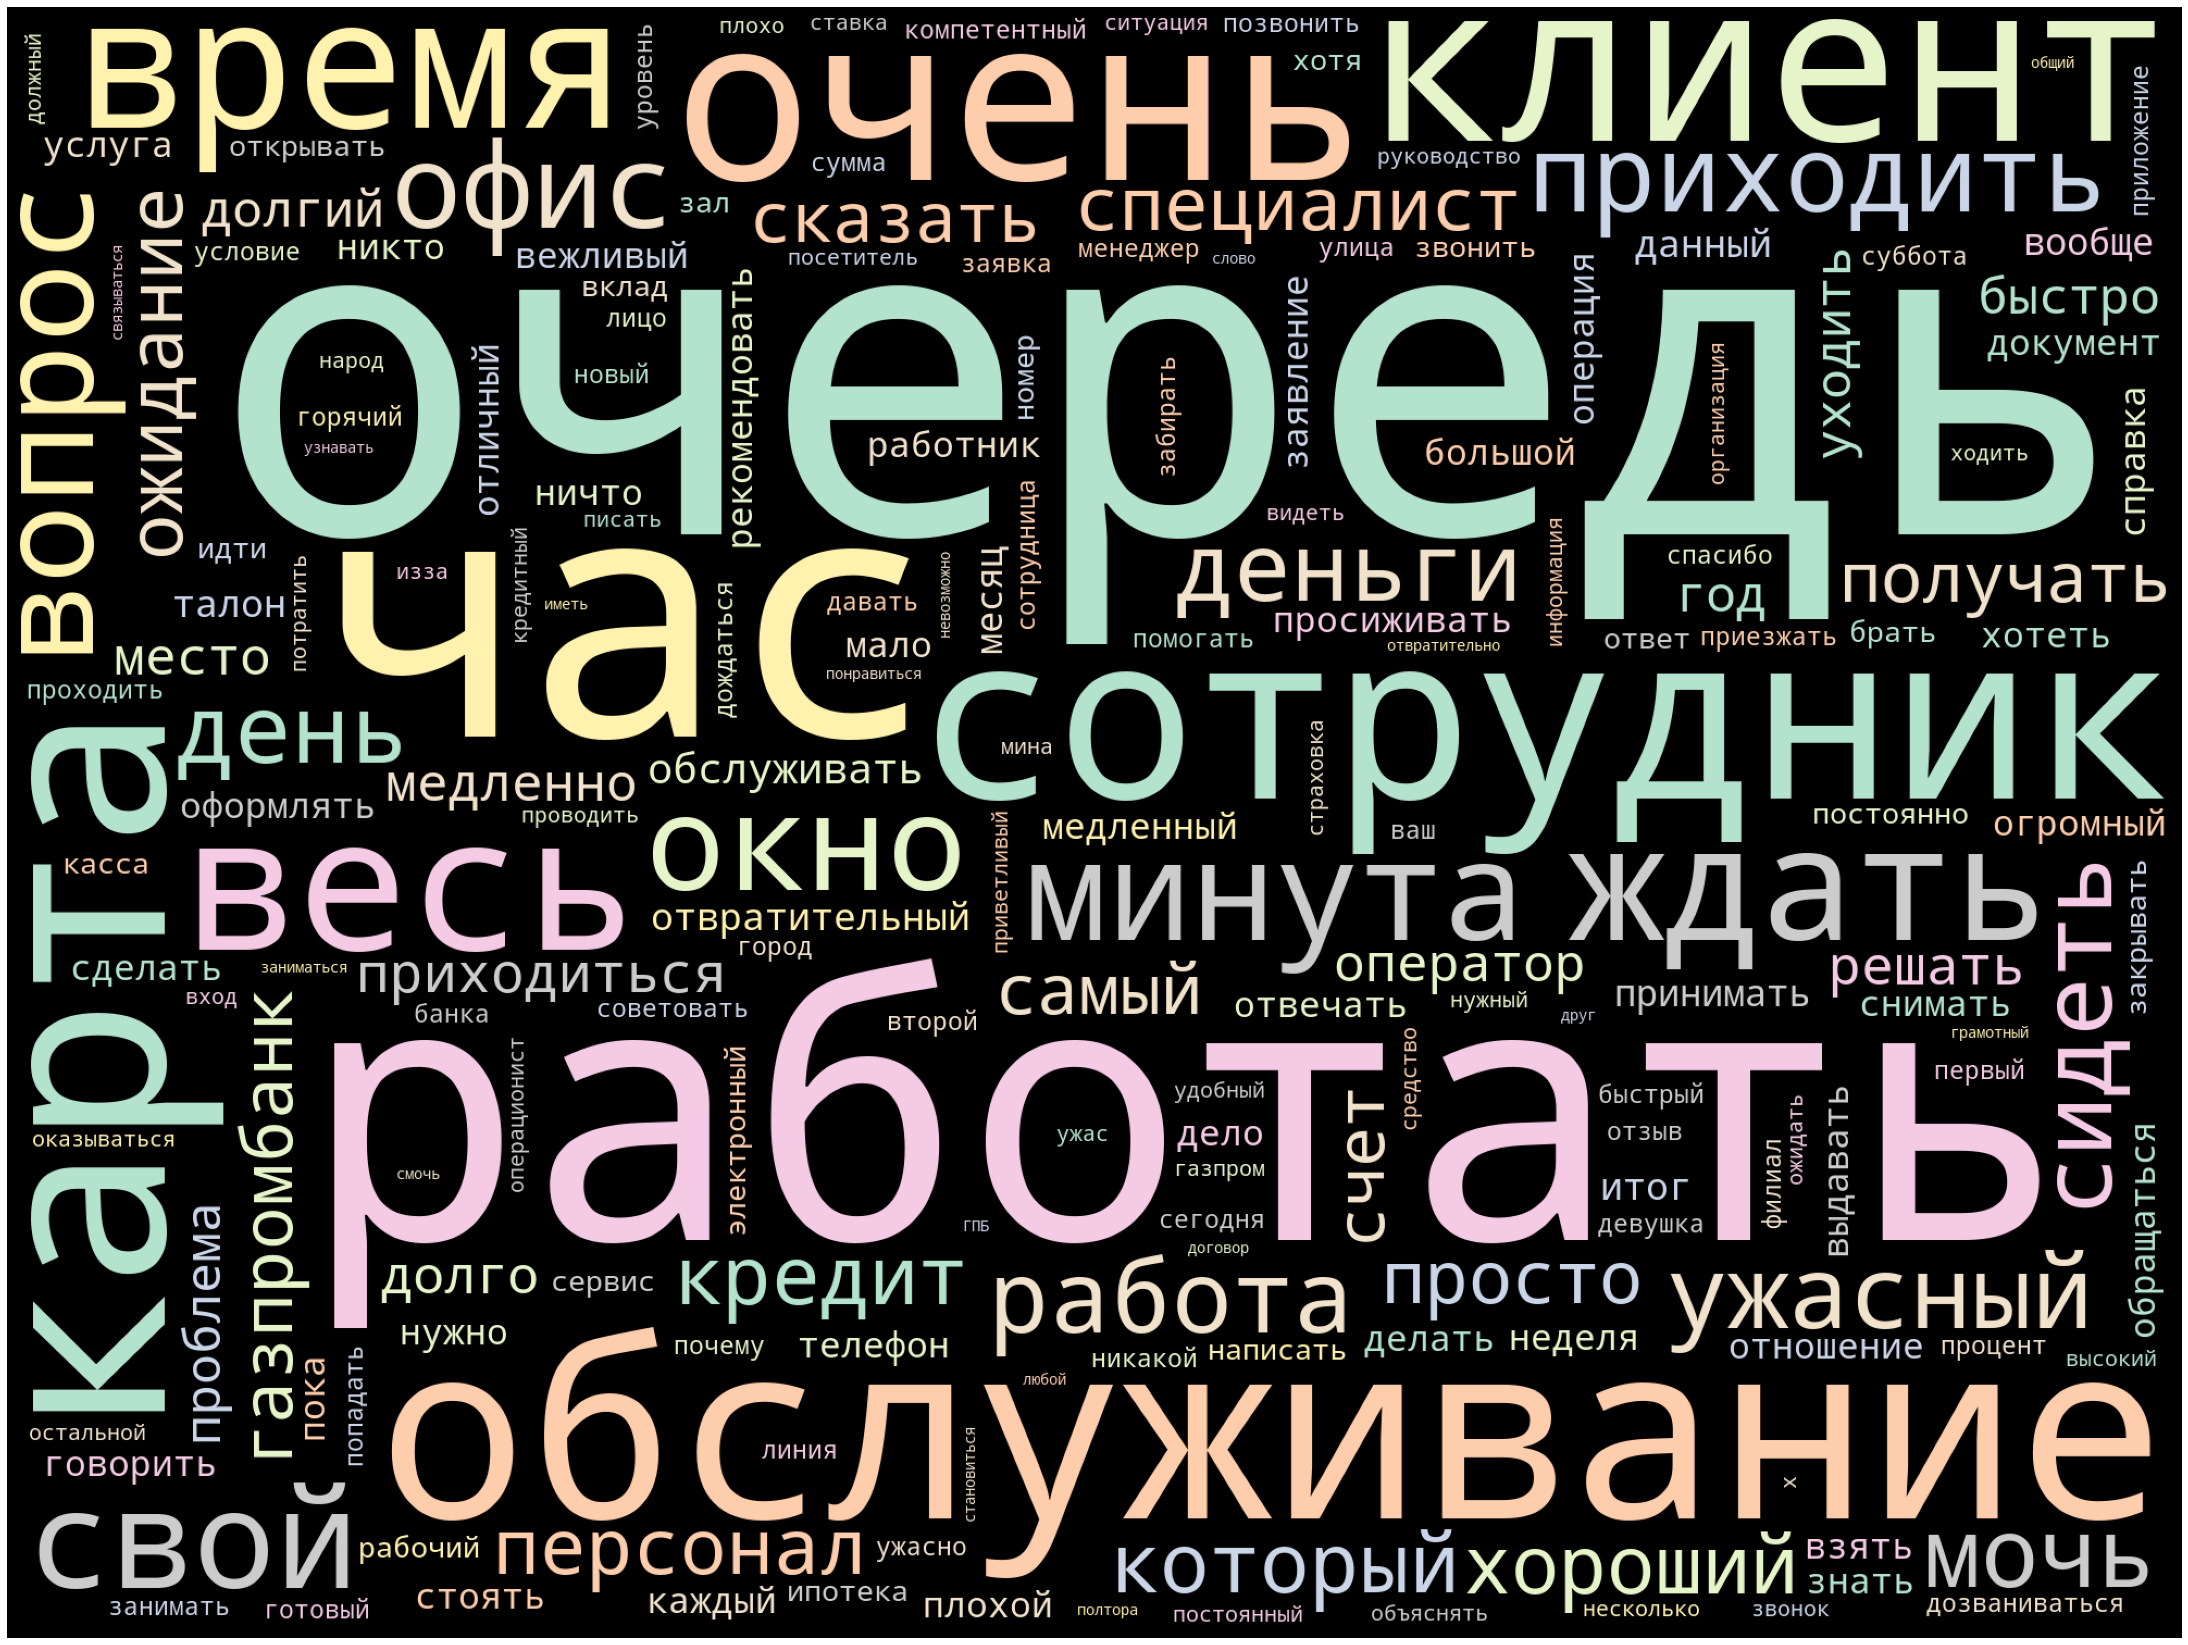

In [8]:
# облако слов
stop_words.append('банк')
stop_words.append('банкомат')
stop_words.append('сбербанк')
stop_words.append('отделение')
stop_words.append('это')
stop_words.append('терминал')
stop_words.append('человек')
cloud = WordCloud(width = 2000, 
                  height = 1500, 
                  random_state=1, 
                  background_color='black', 
                  margin=20, 
                  colormap='Pastel2', 
                  collocations=False, stopwords=stop_words).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(cloud)
plt.axis('off')

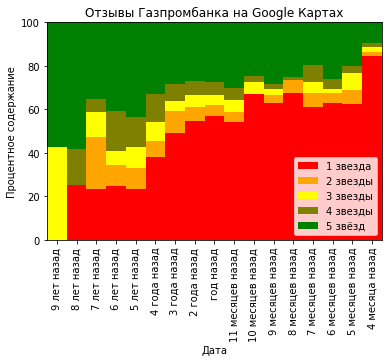

In [7]:
# построение графика
datesReviews = df['date']
typesDates = ['9 лет назад','8 лет назад','7 лет назад','6 лет назад','5 лет назад','4 года назад','3 года назад',
              '2 года назад','год назад','11 месяцев назад','10 месяцев назад','9 месяцев назад','8 месяцев назад',
              '7 месяцев назад','6 месяцев назад','5 месяцев назад','4 месяца назад']
percentTypesDates = []
rating1, rating2, rating3, rating4, rating5 = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
for el in typesDates:
    currentType = df[df['date'] == el]['rating'].value_counts(1)*100
    for j in range(1,6):
        if j not in currentType.index:
            currentType[j] = 0
    rating1 = np.append(rating1, currentType[1])
    rating2 = np.append(rating2, currentType[2])
    rating3 = np.append(rating3, currentType[3])
    rating4 = np.append(rating4, currentType[4])
    rating5 = np.append(rating5, currentType[5])
index = np.arange(17)
plt.axis([-0.5,16.5,0,100])
plt.title('Отзывы Газпромбанка на Google Картах')
plt.bar(index, rating1, color='red', label='1 звезда', width=1)
plt.bar(index, rating2, color='orange',bottom=rating1, label='2 звезды', width=1)
plt.bar(index, rating3, color='yellow',bottom=(rating2+rating1), label='3 звезды', width=1)
plt.bar(index, rating4, color='olive',bottom=(rating3+rating2+rating1), label='4 звезды', width=1)
plt.bar(index, rating5, color='green',bottom=(rating4+rating3+rating2+rating1), label='5 звёзд', width=1)
plt.xticks(index, typesDates, rotation=90)
plt.xlabel("Дата")
plt.ylabel("Процентное содержание")
plt.legend()
plt.show()